# This notebook summarizes the results from Assignment 3

In [5]:
from src.Eigenmodes import *

### First, we plot the laplace matrix for a 4x4 system for all three domain shapes

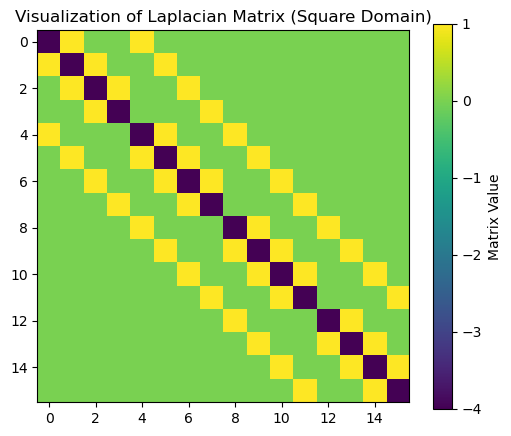

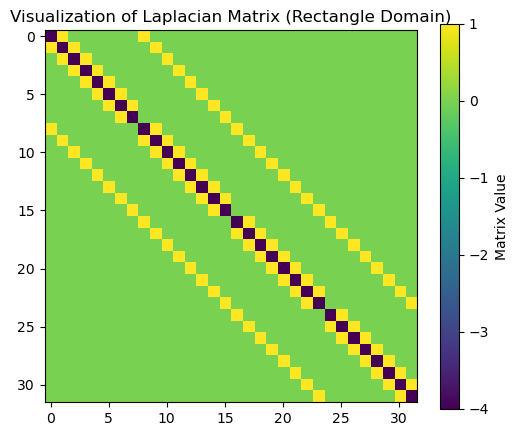

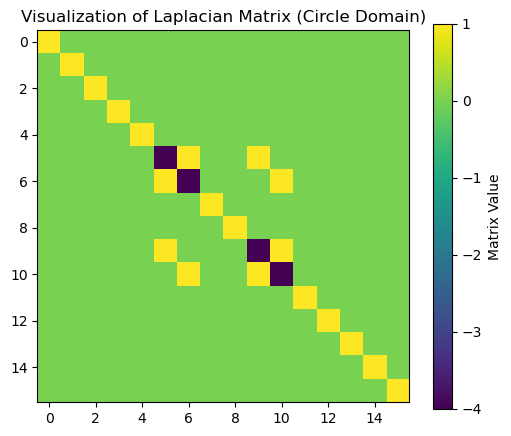

In [9]:
N = 4
domains = ["square", "rectangle", "circle"]

for domain in domains:
    results = simulate_domain(domain, N)       
    plot_matrix(results, domain)

### Now, we plot the first few eigenvectors as 2d arrays given a larger N

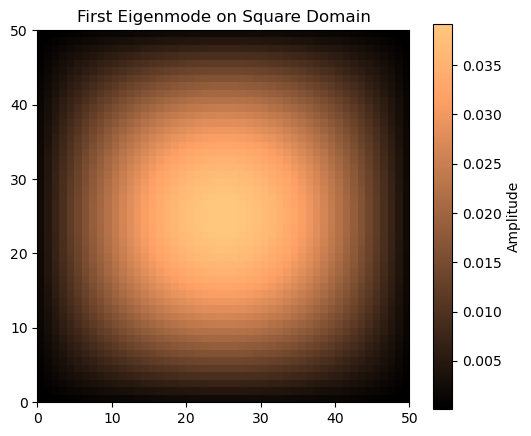

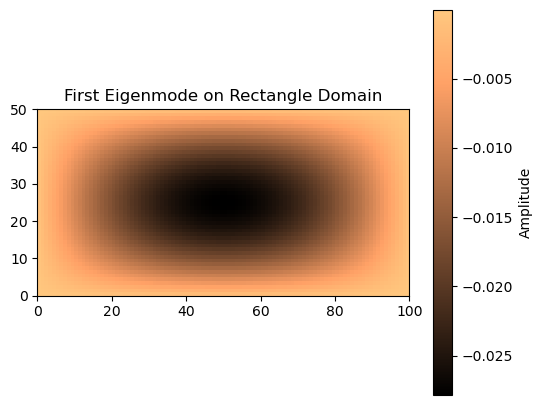

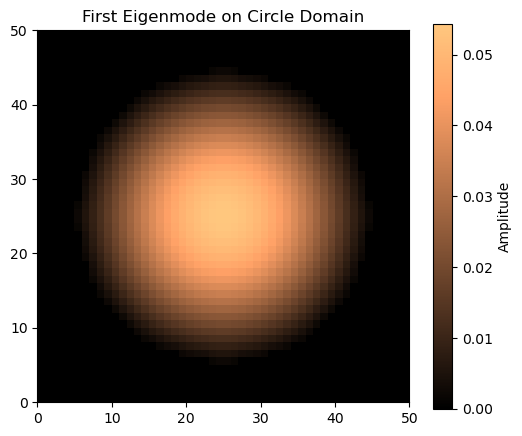

In [7]:
N = 50
domains = ["square", "rectangle", "circle"]

for domain in domains:
    results = simulate_domain(domain, N)       
    plot_eigenmode(results, domain)

### Now we compare the performance between sparse and dense solvers

In [8]:
N = 30       # Grid size parameter (adjust as needed)
num_runs = 20  # Number of runs for performance timing

# Define the domains to test
domains = ["square", "rectangle", "circle"]
performance_stats = {}

# Run performance tests for each domain and store the statistics
for domain in domains:
    print(f"\nRunning performance test for {domain} domain:")
    _, _, stats = compare_solver_performance(domain, N, num_runs)
    performance_stats[domain] = stats

    # Prepare data for plotting: mean execution times and standard deviations
    sparse_means = [performance_stats[d]["sparse_mean"] for d in domains]
    sparse_stds = [performance_stats[d]["sparse_std"] for d in domains]
    dense_means = [performance_stats[d]["dense_mean"] for d in domains]
    dense_stds = [performance_stats[d]["dense_std"] for d in domains]

    # Set up the bar chart (grouped by domain)
    x = np.arange(len(domains))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 6))
    rects1 = ax.bar(x - width/2, sparse_means, width, yerr=sparse_stds,
                    label='Sparse (eigs)', capsize=5)
    rects2 = ax.bar(x + width/2, dense_means, width, yerr=dense_stds,
                    label='Dense (eigh)', capsize=5)

    ax.set_ylabel('Mean Execution Time (seconds)')
    ax.set_title('Solver Performance Comparison by Domain')
    ax.set_xticks(x)
    ax.set_xticklabels([d.capitalize() for d in domains])
    ax.legend()

    plt.tight_layout()
    plt.show()


Running performance test for square domain:

Comparing solvers for the square domain with grid size parameter N = 30 over 20 runs
Sparse solver (spla.eigs) mean time: 0.068892 seconds, std: 0.008732 seconds
Dense solver (scipy.linalg.eigh) mean time: 0.421585 seconds, std: 0.102096 seconds

Eigenvalues from the last run of the sparse solver:
[-0.02052271 -0.08188023 -0.10198284 -0.05120147 -0.05120147]

Eigenvalues from the last run of the dense solver:
[-0.02052271 -0.05120147 -0.05120147 -0.08188023 -0.10198284]


KeyError: 'rectangle'